### Problem: 
User engagement dropped at the end of July. *User engagement* is defined at number of users who made some type of server call by interacting with the product. The dashboard tracks how many users are active, but not how active they are (how many calls they made). 

### Possible causes in user engagement drop:
* Is there an error in sign up/resign up process?

* Is there a cyclical event that caused the drop (subscription, etc)?

* specific to company/country/language used?


### Exploratory data analysis. 
**Users**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df_users = pd.read_csv('yammer_users.csv')
df_users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [120]:
# convert time-related variables to datatime
df_users['created_at'] = pd.to_datetime(df_users['created_at'])
df_users['activated_at'] = pd.to_datetime(df_users['activated_at'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       19066 non-null  float64       
 1   created_at    19066 non-null  datetime64[ns]
 2   company_id    19066 non-null  float64       
 3   language      19066 non-null  object        
 4   activated_at  9381 non-null   datetime64[ns]
 5   state         19066 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 893.8+ KB


In [364]:
# what do we have? 
df_users = df_users.drop_duplicates()
print("\n========================================================")
print("\n Found {} unique users".format(len(df_users.user_id.unique())))
print("\n Found {} unique companies".format(len(df_users.company_id.unique())))
print("\n Found {} unique languages".format(len(df_users.language.unique())))
print(df_users.language.unique())
print("\n Found {} active users and {} pending"
      .format(len(df_users[df_users.state == "active"]), len(df_users[df_users.state == "pending"])))
print("\n========================================================")




 Found 19066 unique users

 Found 13198 unique companies

 Found 12 unique languages
['english' 'german' 'indian' 'spanish' 'french' 'arabic' 'portugese'
 'japanese' 'italian' 'chinese' 'russian' 'korean']

 Found 9381 active users and 9685 pending



In [122]:
def visualize(df, column_names, colors, title):
    """
    Visualize a dataframe with a date column.

    Parameters
    ----------
    df : Pandas dataframe
    column_names : str
        Column to visualize
    colors : str
    title : str
    """
    plt.figure(figsize=(20, 10))
    for i in range (len(column_names)):
        column_name = column_names[i]
        ax = (df[column_name].groupby([df[column_name].dt.year,df[column_name].dt.month])
                         .count()).plot(kind="bar", color=colors[i])
        ax.set_facecolor('#eeeeee')
        ax.set_xlabel("months")
        ax.set_ylabel("count")
        ax.set_title(title)
    plt.legend(column_names)
    plt.show()

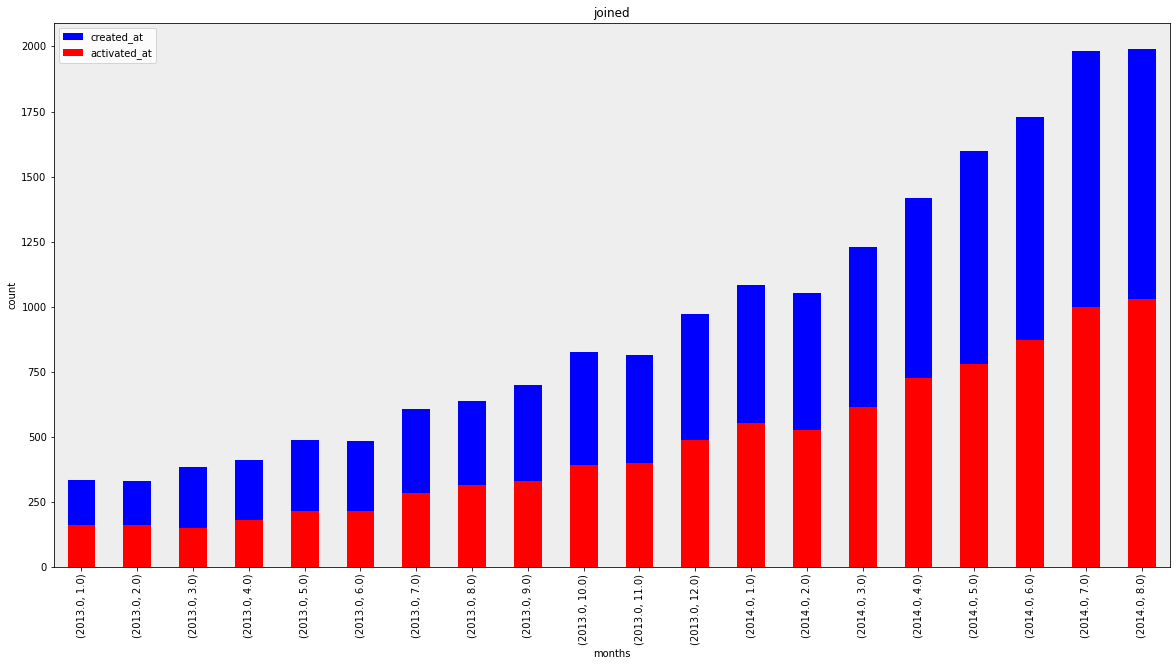

In [123]:
visualize (df = df_users, column_names = ["created_at", "activated_at"], colors=['blue','red'], title="joined")

In [370]:
df_users.groupby(['language']).count()['activated_at']/ df_users.groupby(['language']).count()['state']

language
arabic       0.475260
chinese      0.509489
english      0.497966
french       0.477661
german       0.482662
indian       0.480274
italian      0.471429
japanese     0.496979
korean       0.525926
portugese    0.460784
russian      0.502674
spanish      0.483907
dtype: float64

**events**
* event_type: *signup_flow*, *engagement*

In [371]:
df_events = pd.read_csv('yammer_events.csv')
df_events['occurred_at'] = pd.to_datetime(df_events['occurred_at'])
df_events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [372]:
df_events.isna().sum() # what's up with user_type?

user_id            0
occurred_at        0
event_type         0
event_name         0
location           0
device             0
user_type      15577
dtype: int64

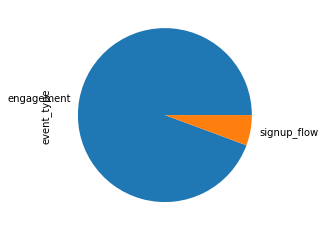

In [376]:
df_events["event_type"].value_counts().plot(kind = "pie") # event_types consist mostly of engagement types

In [378]:
# select only engagement events
df_engagement = df_events[df_events['event_type'] == 'engagement'] 


In [365]:
print("\n========================================================")
print("there are {} unique users on engagement list".format(len(df_engagement['user_id'].unique())))
print("there are {} unique locations".format(len(df_engagement['location'].unique())))
print(df_engagement['event_name'].unique())
print("\n========================================================")



there are 6142 unique users on engagement list
there are 47 unique locations
['login' 'home_page' 'like_message' 'view_inbox' 'search_run'
 'send_message' 'search_autocomplete' 'search_click_result_10'
 'search_click_result_7' 'search_click_result_8' 'search_click_result_1'
 'search_click_result_3' 'search_click_result_2' 'search_click_result_5'
 'search_click_result_6' 'search_click_result_9' 'search_click_result_4']



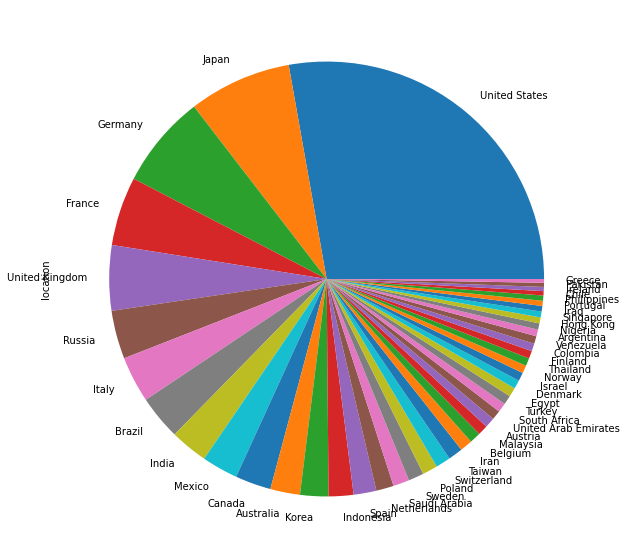

In [323]:
plt.figure(figsize = (20,10))
df_engagement["location"].value_counts().plot(kind="pie")

In [155]:
df_engagement.groupby(['user_type']).count()

,user_id,occurred_at,event_type,event_name,location,device
user_type,,,,,,
1.0,209767,209767,209767,209767,209767,209767
2.0,61501,61501,61501,61501,61501,61501
3.0,50300,50300,50300,50300,50300,50300


**emails** 
* action: *sent_weekly_digest*, *email_open*, *email_clickthrough*, *sent_reengagement_email*

In [379]:
df_emails = pd.read_csv("yammer_emails.csv")
df_emails["occurred_at"] = pd.to_datetime(df_emails["occurred_at"])
df_emails.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [366]:
print("\n========================================================")
print(df_emails["action"].unique())
print("\n========================================================")



['sent_weekly_digest' 'email_open' 'email_clickthrough'
 'sent_reengagement_email']



In [367]:
print("\n========================================================")
print("there are {} unique users on the email list".format(len(df_emails["user_id"].unique())))
print("\n========================================================")



there are 6179 unique users on the email list



### Do users interact with the servers differently? Can that account for change in engagement?


In [210]:
df_engagement.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [325]:
df_engagement["event_name"].value_counts()

home_page                 94065
like_message              59248
view_inbox                55936
login                     38609
send_message              33105
search_autocomplete       17820
search_run                13019
search_click_result_2      1496
search_click_result_1      1412
search_click_result_4      1264
search_click_result_3      1133
search_click_result_5       967
search_click_result_6       805
search_click_result_9       784
search_click_result_7       709
search_click_result_8       690
search_click_result_10      506
Name: event_name, dtype: int64

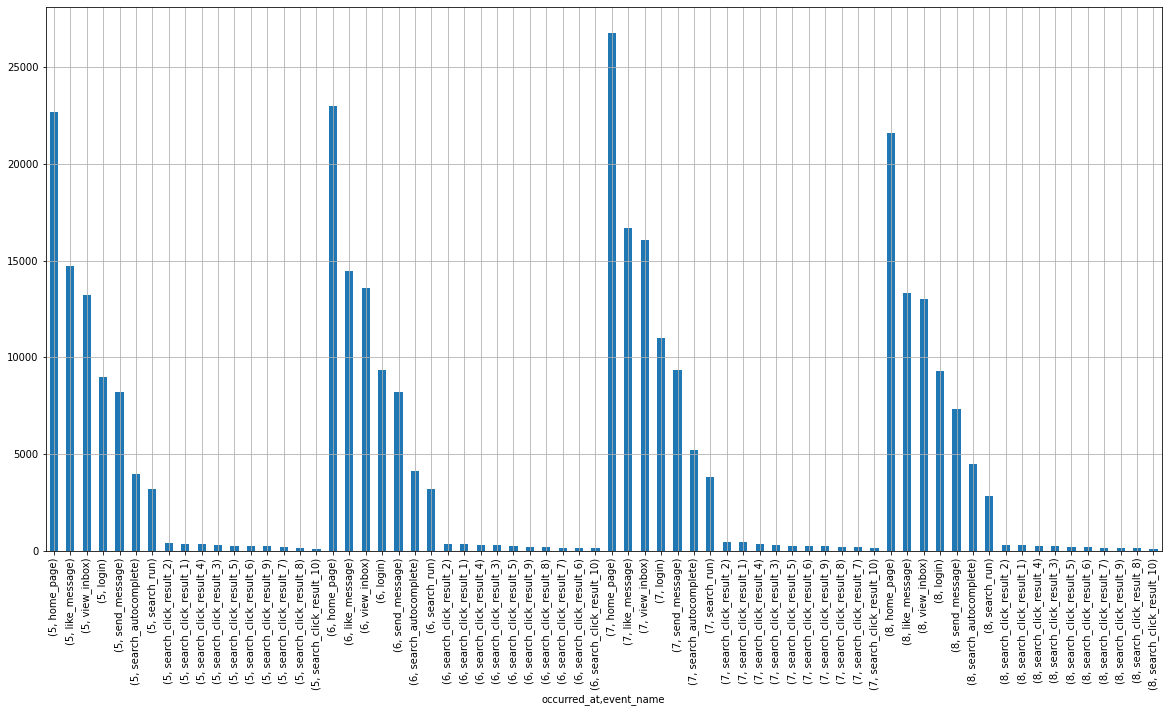

In [296]:
event_counts = df_engagement["event_name"].groupby(df_engagement['occurred_at'].dt.month).value_counts()
plt.figure(figsize=(20,10))
event_counts.plot(kind = 'bar', grid = True)

This is not the best plot, but it looks like all engagement types dropped in august. The drop is not due to what users were interested in. Maybe if we look at who are the users who dropped we may deduce a cause.

### Let's check if maybe the engagement drop is due to email behavior

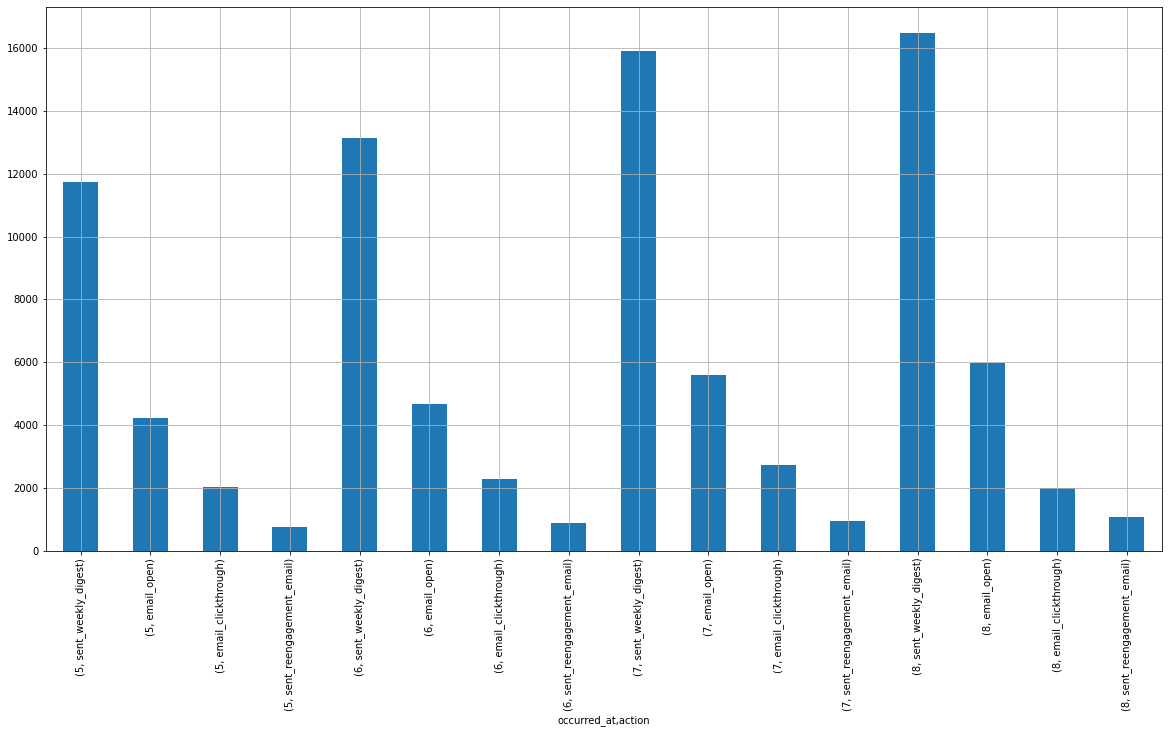

In [302]:
event_counts = df_emails["action"].groupby(df_emails['occurred_at'].dt.month).value_counts()
plt.figure(figsize=(20,10))
event_counts.plot(kind = 'bar', grid = True)

We see that the number of *sent out emails* as well as *openned emails* is increasing, but there is a slight drop in number of users who *click on the link* in the email (~700 users). This may be due to changes in software for a specific device. We should check is users with a specific device type were less likely to click on the email.  

In [380]:
# lets select a subset of users from July
start_date = "07-01-2014"
end_date = "07-31-2014"

mask = (df_emails['occurred_at'] > start_date) & (df_emails['occurred_at'] <= end_date)
august_emails = df_emails.loc[mask]
user_ids_open = august_emails.loc[august_emails["action"] == "email_open"]["user_id"]
user_ids_click = august_emails.loc[august_emails["action"] == "email_clickthrough"]["user_id"]

print("\nIn July, there were {} users who openned the email, and {} users who clicked on the link"
      .format(len(user_ids_open),len(user_ids_click)))

# lets select a subset of users from August
start_date = "08-01-2014"
end_date = "08-31-2014"

mask = (df_emails['occurred_at'] > start_date) & (df_emails['occurred_at'] <= end_date)
august_emails = df_emails.loc[mask]

user_ids_open = august_emails.loc[august_emails["action"] == "email_open"]["user_id"]
user_ids_click = august_emails.loc[august_emails["action"] == "email_clickthrough"]["user_id"]
len(user_ids_open)
len(user_ids_click)
print("\nIn August, there were {} users who openned the email, and {} users who clicked on the link"
      .format(len(user_ids_open),len(user_ids_click)))


In July, there were 5380 users who openned the email, and 2613 users who clicked on the link

In August, there were 5937 users who openned the email, and 1954 users who clicked on the link


In [363]:
device_open = df_engagement.loc[df_engagement["user_id"].isin(user_ids_open)] # select devices used to open an email
device_click = df_engagement.loc[df_engagement["user_id"].isin(user_ids_click)] # select devices used to click on the email

print("\nThere were {} devices used to open emails and {} devices used when clicked on the email"
     .format(len(device_open.device.unique()),len(device_click.device.unique())))


There were 26 devices used to open emails and 26 devices used when clicked on the email


In [381]:
device_open = df_engagement.loc[df_engagement["user_id"].isin(user_ids_open)] # select devices used to open an email
device_click = df_engagement.loc[df_engagement["user_id"].isin(user_ids_click)] # select devices used to click on the email

print("\nThere were {} locations where emails were openned and {} locations where emails were clicked"
     .format(len(device_open.location.unique()),len(device_click.location.unique())))


There were 47 locations where emails were openned and 47 locations where emails were clicked


It doesn't seem like there is a difference in the number of devices that the email was openned in and clicked. **The issue is unlikely to be due to device type or location**

### are new users having difficulty signing up?
was there an error during sign up?

In [368]:
df_signup = df_events[df_events['event_type'] == 'signup_flow']
df_signup.head()
print("\n========================================================")
print(df_signup["event_name"].unique())
print("\n========================================================")



['create_user' 'enter_email' 'enter_info' 'complete_signup']



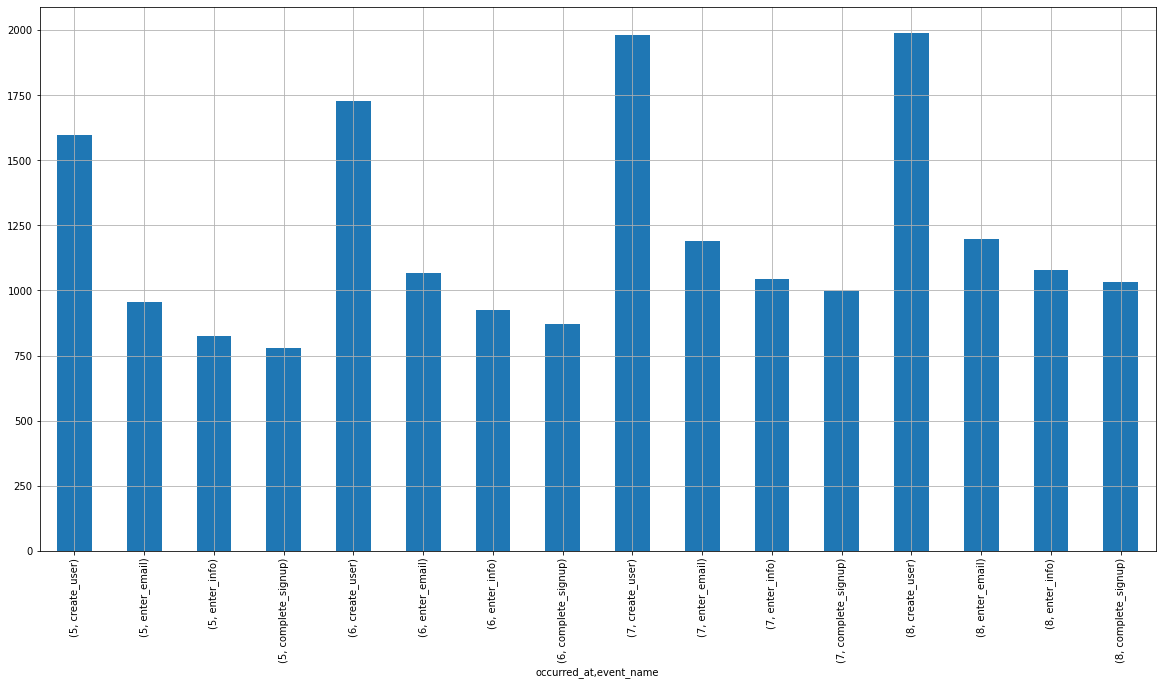

In [332]:
event_counts = df_signup["event_name"].groupby(df_signup['occurred_at'].dt.month).value_counts()
plt.figure(figsize=(20,10))
event_counts.plot(kind = 'bar', grid = True)

Though we see a plateau in the number of *new users created* and *entered emails*, 
it seems like we still have a slight increase in *completed signups*, which means that we are still 
**increasing in number of new users**. 

### Problem:
There has been a noticeable drop in the number of users who engage with Yammer starting in August (~300). 

### Summary, Suggestions
This change cannot be explained by the type of engagement (all types decreases similarly) or by drop in new users. There was not a difference in the numbers of users who completed the sign up. But there was a difference in the number of users who clicked on a link in the re-engagement email. This decrease was not due to the device that the users used to open the email. Is it likely that a subset of users received a wrong or not functional link? 